In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./CMO_MSP_Mandi.csv")
data.head()

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


In [3]:
print(data['msp_filter'].unique())
print("-"*40)
print(data['Type'].unique())
print("-"*40)
print(data['year'].unique())
print("-"*40)
print(data['commodity'].unique())
print("-"*40)
print(data['msprice'].unique())

[1]
----------------------------------------
['Kharif Crops' 'Rabi Crops' 'Other Crops']
----------------------------------------
[2012 2013 2014 2015 2016]
----------------------------------------
['PADDY-UNHUSKED' 'RICE(PADDY-HUS)' 'Jowar_Hybrid' 'SORGUM(JAWAR)' 'BAJRI'
 'MAIZE' 'Ragi_Maldandi' 'PIGEON PEA (TUR)' 'SPILT GERRN GRAM'
 'SPLIT BLACK GRAM' 'COTTON' 'Cotton_Long Staple' 'GR.NUT KERNELS'
 'SUNFLOWER' 'Soyabean_Black' 'SOYABEAN' 'SESAMUM' 'NIGER-SEED'
 'WHEAT(HUSKED)' 'WHEAT(UNHUSKED)' 'BARLI' 'Gram_Yellow' 'Masur_Yellow'
 'MUSTARD' 'SAFFLOWER' 'Toria_Yellow' 'Copra (Milling)_Yellow'
 'Copra (Ball)_Yellow' 'COCONUT' 'Jute_Yellow' 'SUGAR-CANE' 'SUGARCANE']
----------------------------------------
[ 1250.  1280.  1500.  1520.  1175.  3850.  4400.  4300.  3600.  3900.
  3700.  2200.  2240.  4200.  3500.  1350.   980.  3000.  2900.  2800.
  2970.  5100.  5350.  1400.   170.  1310.  1345.  4500.  4000.  2500.
  2560.  1100.  3100.  2950.  3050.  3020.  5250.  5500.  1425.  2300.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
commodity     155 non-null object
year          155 non-null int64
Type          155 non-null object
msprice       145 non-null float64
msp_filter    155 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.1+ KB


In [5]:
#data['year'] = pd.to_datetime(data['year'])

In [6]:
data['msprice'].isnull().values.any()

True

msprice contains null value

In [7]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [8]:
data_without_null = data.dropna()

In [9]:
data_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 154
Data columns (total 5 columns):
commodity     145 non-null object
year          145 non-null int64
Type          145 non-null object
msprice       145 non-null float64
msp_filter    145 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.8+ KB


In [10]:
"""from sklearn.preprocessing import Imputer
my_imputer = Imputer()
data_with_imputed_values = my_imputer.fit_transform(data)"""

'from sklearn.preprocessing import Imputer\nmy_imputer = Imputer()\ndata_with_imputed_values = my_imputer.fit_transform(data)'

In [11]:
data['Type'] = data['Type'].map( {'Kharif Crops':2, 'Rabi Crops':1, 'Other Crops':0} ).astype(int)

**Type Mapping:**
    'Kharif Crops':2, 'Rabi Crops':1, 'Other Crops':0

In [12]:
data['commodity'] = data['commodity'].map( {'PADDY-UNHUSKED':0, 'RICE(PADDY-HUS)':1, 'Jowar_Hybrid':2, 'SORGUM(JAWAR)':3, 'BAJRI':4,
 'MAIZE':5, 'Ragi_Maldandi': 6, 'PIGEON PEA (TUR)':7, 'SPILT GERRN GRAM':8,
 'SPLIT BLACK GRAM':9, 'COTTON':10, 'Cotton_Long Staple':11, 'GR.NUT KERNELS':12,
 'SUNFLOWER':13, 'Soyabean_Black':14, 'SOYABEAN':15, 'SESAMUM':16, 'NIGER-SEED':17,
 'WHEAT(HUSKED)':18, 'WHEAT(UNHUSKED)':19, 'BARLI':20, 'Gram_Yellow':21, 'Masur_Yellow':22,
 'MUSTARD':23, 'SAFFLOWER':24, 'Toria_Yellow':25, 'Copra (Milling)_Yellow':26,
 'Copra (Ball)_Yellow':27, 'COCONUT':28, 'Jute_Yellow':29, 'SUGAR-CANE':30, 'SUGARCANE':31} ).astype(int)

**Commodity Mapping:**
    PADDY-UNHUSKED':0, 'RICE(PADDY-HUS)':1, 'Jowar_Hybrid':2, 'SORGUM(JAWAR)':3, 'BAJRI':4,
 'MAIZE':5, 'Ragi_Maldandi': 6, 'PIGEON PEA (TUR)':7, 'SPILT GERRN GRAM':8,
 'SPLIT BLACK GRAM':9, 'COTTON':10, 'Cotton_Long Staple':11, 'GR.NUT KERNELS':12,
 'SUNFLOWER':13, 'Soyabean_Black':14, 'SOYABEAN':15, 'SESAMUM':16, 'NIGER-SEED':17,
 'WHEAT(HUSKED)':18, 'WHEAT(UNHUSKED)':19, 'BARLI':20, 'Gram_Yellow':21, 'Masur_Yellow':22,
 'MUSTARD':23, 'SAFFLOWER':24, 'Toria_Yellow':25, 'Copra (Milling)_Yellow':26,
 'Copra (Ball)_Yellow':27, 'COCONUT':28, 'Jute_Yellow':29, 'SUGAR-CANE':30, 'SUGARCANE':31

In [13]:
data.head(10)

,commodity,year,Type,msprice,msp_filter
0,0,2012,2,1250.0,1
1,1,2012,2,1280.0,1
2,2,2012,2,1500.0,1
3,3,2012,2,1520.0,1
4,4,2012,2,1175.0,1
5,5,2012,2,1175.0,1
6,6,2012,2,1500.0,1
7,7,2012,2,3850.0,1
8,8,2012,2,4400.0,1
9,9,2012,2,4300.0,1


In [14]:
from sklearn.preprocessing import Imputer
my_imputer = Imputer()
data_re = my_imputer.fit_transform(data)

In [15]:
data2 = pd.DataFrame(data_re)

In [16]:
data2.isnull().values.any()

False

In [17]:
data2["commodity"] = data2[0]
data2["year"] = data2[1]
data2["Type"] = data2[2]
data2["msprice"] = data2[3]
data2["msp_filter"] = data2[4]
data2.head()

,0,1,2,3,4,commodity,year,Type,msprice,msp_filter
0,0.0,2012.0,2.0,1250.0,1.0,0.0,2012.0,2.0,1250.0,1.0
1,1.0,2012.0,2.0,1280.0,1.0,1.0,2012.0,2.0,1280.0,1.0
2,2.0,2012.0,2.0,1500.0,1.0,2.0,2012.0,2.0,1500.0,1.0
3,3.0,2012.0,2.0,1520.0,1.0,3.0,2012.0,2.0,1520.0,1.0
4,4.0,2012.0,2.0,1175.0,1.0,4.0,2012.0,2.0,1175.0,1.0


In [18]:
data2 = data2.drop([0, 1, 2, 3, 4], axis = 1)

In [19]:
data2.head()

,commodity,year,Type,msprice,msp_filter
0,0.0,2012.0,2.0,1250.0,1.0
1,1.0,2012.0,2.0,1280.0,1.0
2,2.0,2012.0,2.0,1500.0,1.0
3,3.0,2012.0,2.0,1520.0,1.0
4,4.0,2012.0,2.0,1175.0,1.0


<BarContainer object of 155 artists>

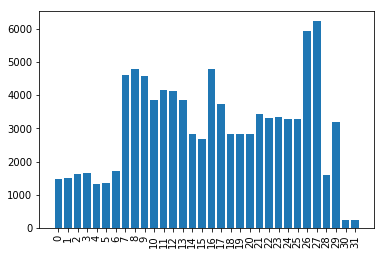

In [20]:
% matplotlib inline
plt.xticks(np.arange(0, 32, 1), rotation=90)
plt.bar(data2['commodity'], data2['msprice'])


**Inferences**
    Copra(Ball)_yellow: highest selling
    Copra (Milling)_Yellow: second highest
    SUGAR-CANE: Least selling
    
    

<BarContainer object of 155 artists>

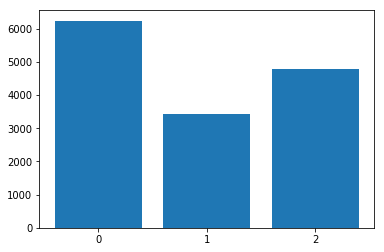

In [21]:
plt.xticks(np.arange(0, 3, 1))
plt.bar(data2['Type'], data2['msprice'])

# Checking for outliers

Other crops are selling high, Rabi next and kharif last.

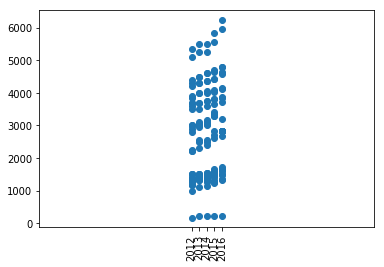

In [22]:
plt.xticks([2012, 2013, 2014, 2015, 2016], rotation = 90)
plt.scatter(data2['year'], data2['msprice'])

There are few outliers.

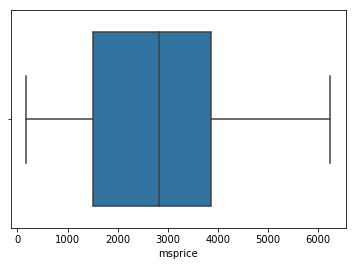

In [23]:
'''plt.xticks(np.arange(0, 3, 1))
plt.scatter(data2['Type'], data2['msprice'])'''
import seaborn as sns
sns.boxplot(x=data2['msprice'])

In [24]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data2['msprice']))
print(z)

[ 1.13156176  1.10997323  0.95165731  0.93726496  1.1855331   1.1855331
  0.95165731  0.73944451  1.13523429  1.06327251  0.55954006  0.7754254
  0.63150184  0.63150184  0.44792486  0.41914014  0.99131073  0.48757828
  1.05959998  1.05959998  1.32585857  0.12776938  0.0558076   0.12776938
  0.01615418  0.10618085  1.63896675  1.8188712   1.02361909  0.44792486
  1.90874898  1.08838469  1.06319807  0.95165731  0.93726496  1.08838469
  1.08838469  0.95165731  1.06327251  1.20719607  1.06327251  0.63150184
  0.84738718  0.84738718  0.63150184  0.23203952  0.18886245  1.20719607
  0.48757828  1.02361909  1.02361909  1.23950443  0.19973116  0.09178849
  0.16375027  0.12776938  0.14216174  1.74690942  1.92681387  1.00562865
  0.37596308  1.87996427  1.0524038   1.02361909  0.93006878  0.91567642
  1.13156176  1.08838469  0.91567642  1.0992534   1.27915785  1.0992534
  0.66748273  0.88336806  0.84738718  0.66748273  0.23203952  0.18886245
  1.27915785  0.55954006  0.9876382   0.9876382   1.20

In [25]:
threshold = [3, 2, 1]
for i in threshold:
    print(i)
    print(np.where(z > i))
    print('-'*40)

3
(array([], dtype=int64),)
----------------------------------------
2
(array([120, 150, 151]),)
----------------------------------------
1
(array([  0,   1,   4,   5,   8,   9,  18,  19,  20,  26,  27,  28,  30,
        31,  32,  35,  36,  38,  39,  40,  47,  49,  50,  51,  57,  58,
        59,  61,  62,  63,  66,  67,  69,  70,  71,  78,  82,  88,  89,
        90,  92,  93,  97,  98, 100, 101, 102, 109, 113, 119, 120, 123,
       128, 129, 131, 132, 133, 140, 150, 151, 154]),)
----------------------------------------


#there are no outliers

In [26]:
from sklearn.neighbors import LocalOutlierFactor

In [27]:
X = data2.loc[:, 'commodity':'msprice':3]
#X
n_outliers = len(X)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

In [28]:
clf = LocalOutlierFactor()

In [29]:
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

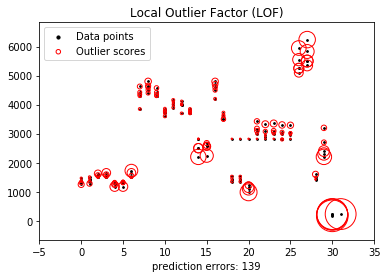

In [30]:
'''y_pred
X_scores'''

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X['commodity'], X['msprice'], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X['commodity'], X['msprice'], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 35))
#plt.ylim((-10, 6.5e3))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

# Trends

In [31]:
Rabi = data2.loc[data2['Type'] == 1]
kharif = data2.loc[data2['Type'] == 2]
other = data2.loc[data2['Type'] == 0]

In [32]:
y1 = Rabi.groupby('year')['msprice'].mean()
y2 = other.groupby('year')['msprice'].mean()
y0 = other.groupby('year')['msprice'].mean()

In [45]:
#X = data2['year']
#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)

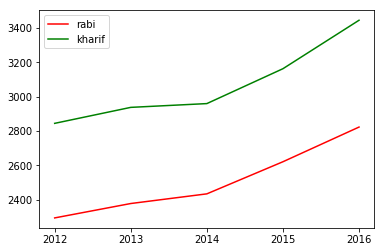

In [49]:
plt.xticks([2012, 2013, 2014, 2015, 2016])
plt.plot(y1,  'r', label = 'rabi')
#plt.plot(y0, 'b')
plt.plot(y2, 'g', label = 'kharif')
plt.legend()

"plt.plot(y1, 'r')\nplt.plot(y2, 'g')"

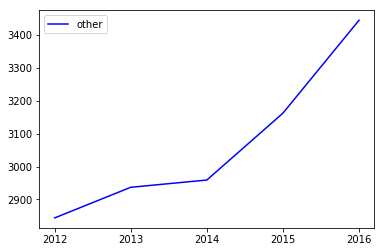

In [50]:
plt.xticks([2012, 2013, 2014, 2015, 2016])
plt.plot(y0, 'b', label = 'other')
plt.legend()
"""plt.plot(y1, 'r')
plt.plot(y2, 'g')"""

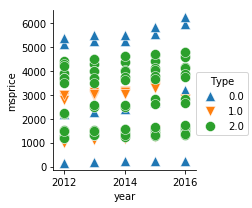

In [36]:
import seaborn as sns
g = sns.FacetGrid(data2, hue="Type", hue_kws={"marker": ["^", "v", "o"]})
g.map(plt.scatter, "year", "msprice", s=100, linewidth=.5, edgecolor="white")
g.add_legend()

# Feature Importance